<a href="https://colab.research.google.com/github/hamegg320/MMEs/blob/main/precipitation_MIROC_day_historical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Google Driveに接続させる
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 作業ディレクトリを移動する　→　そのディレクトリでデータを保存できる
%cd /content/drive/MyDrive/nozue_version/precipitation_model_day/

/content/drive/MyDrive/nozue_version/precipitation_model_day


In [25]:
# 作業領域を確認する
%ls

pr_day_MIROC6_historical_r1i1p1f1_gn_19000101-19091231.nc
pr_day_MIROC6_ssp245_r1i1p1f1_gn_20950101-21001231.nc
pr_day_MIROC6_ssp370_r1i1p1f1_gn_20950101-21001231.nc
pr_day_MIROC6_ssp585_r1i1p1f1_gn_20950101-21001231.nc


In [5]:
pip install netCDF4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.1 MB/s eta 0:00:00


In [6]:
### Import modules
import os
import csv
import math
from netCDF4 import Dataset
import matplotlib.pyplot as plt

###日平均データ 1900年1月1日~12月31日 

In [1]:
# ディレクトリパス
current_directory = "/content/drive/MyDrive/nozue_version/precipitation_model_day/"

In [18]:
# データを読み込む
file = current_directory + "pr_day_MIROC6_historical_r1i1p1f1_gn_19000101-19091231.nc"
ds = Dataset(file, mode='r',format="NETCDF4")

In [19]:
print(ds) #メタデータへのアクセス

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.7 CMIP-6.2
    activity_id: CMIP
    branch_method: standard
    branch_time_in_child: 0.0
    branch_time_in_parent: 0.0
    creation_date: 2019-08-30T09:05:40Z
    data_specs_version: 01.00.31
    experiment: all-forcing simulation of the recent past
    experiment_id: historical
    external_variables: areacella
    forcing_index: 1
    frequency: day
    further_info_url: https://furtherinfo.es-doc.org/CMIP6.MIROC.MIROC6.historical.none.r1i1p1f1
    grid: native atmosphere T85 Gaussian grid
    grid_label: gn
    history: 2019-08-30T09:05:40Z ; CMOR rewrote data to be consistent with CMIP6, CF-1.7 CMIP-6.2 and CF standards.
    initialization_index: 1
    institution: JAMSTEC (Japan Agency for Marine-Earth Science and Technology, Kanagawa 236-0001, Japan), AORI (Atmosphere and Ocean Research Institute, The University of Tokyo, Chiba 277-8564, Japan), NIES (National In

In [ ]:
#変数について
for var in ds.variables.values():
  print(var)

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    bounds: time_bnds
    units: days since 1850-1-1
    calendar: gregorian
    axis: T
    long_name: time
    standard_name: time
unlimited dimensions: time
current shape = (3652,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 time_bnds(time, bnds)
unlimited dimensions: time
current shape = (3652, 2)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    bounds: lat_bnds
    units: degrees_north
    axis: Y
    long_name: Latitude
    standard_name: latitude
unlimited dimensions: 
current shape = (128,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lat_bnds(lat, bnds)
unlimited dimensions: 
current shape = (128, 2)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    bounds: lon_bnds
   

In [ ]:
time=ds["time"][:]  
for i in range(3652):
 print(time[i])

18262.5
18263.5
18264.5
18265.5
18266.5
18267.5
18268.5
18269.5
18270.5
18271.5
18272.5
18273.5
18274.5
18275.5
18276.5
18277.5
18278.5
18279.5
18280.5
18281.5
18282.5
18283.5
18284.5
18285.5
18286.5
18287.5
18288.5
18289.5
18290.5
18291.5
18292.5
18293.5
18294.5
18295.5
18296.5
18297.5
18298.5
18299.5
18300.5
18301.5
18302.5
18303.5
18304.5
18305.5
18306.5
18307.5
18308.5
18309.5
18310.5
18311.5
18312.5
18313.5
18314.5
18315.5
18316.5
18317.5
18318.5
18319.5
18320.5
18321.5
18322.5
18323.5
18324.5
18325.5
18326.5
18327.5
18328.5
18329.5
18330.5
18331.5
18332.5
18333.5
18334.5
18335.5
18336.5
18337.5
18338.5
18339.5
18340.5
18341.5
18342.5
18343.5
18344.5
18345.5
18346.5
18347.5
18348.5
18349.5
18350.5
18351.5
18352.5
18353.5
18354.5
18355.5
18356.5
18357.5
18358.5
18359.5
18360.5
18361.5
18362.5
18363.5
18364.5
18365.5
18366.5
18367.5
18368.5
18369.5
18370.5
18371.5
18372.5
18373.5
18374.5
18375.5
18376.5
18377.5
18378.5
18379.5
18380.5
18381.5
18382.5
18383.5
18384.5
18385.5
18386.5


In [11]:
lat=ds["lat"][:]  
for i in range(128):
 print(lat[i])

-88.92773535229591
-87.53870521302717
-86.1414721015279
-84.74238559071425
-83.34259604407038
-81.94246629917325
-80.54214643461712
-79.1417096486217
-77.74119586551386
-76.34062870237155
-74.94002301964944
-73.53938863376749
-72.13873228916239
-70.73805877251762
-69.3373715749609
-67.93667330257854
-66.53596594017563
-65.13525102603525
-63.73452977084287
-62.333803140532446
-60.93307191520744
-59.53233673182661
-58.13159811564393
-56.7308565037137
-55.33011226270278
-53.929365702556076
-52.52861708709967
-51.12786664235329
-49.72711456310966
-48.32636101818818
-46.9256061546646
-45.52485010130229
-44.12409297135585
-42.723334864876975
-41.322575870623126
-39.92181606764648
-38.52105552662436
-37.12029431097885
-35.719532477823975
-34.31877007877067
-32.918007160613975
-31.517243765922586
-30.116479933546326
-28.715715699055192
-27.314951095120396
-25.914186151846668
-24.513420897062915
-23.112655356577648
-21.711889554404237
-20.311123512960364
-18.91035725324536
-17.509590794998555
-

In [12]:
lon=ds["lon"][:]
for i in range(256):
 print(lon[i])

0.0
1.40625
2.8125
4.21875
5.625
7.03125
8.4375
9.84375
11.25
12.65625
14.0625
15.46875
16.875
18.28125
19.6875
21.09375
22.5
23.90625
25.3125
26.71875
28.125
29.53125
30.9375
32.34375
33.75
35.15625
36.5625
37.96875
39.375
40.78125
42.1875
43.59375
45.0
46.40625
47.8125
49.21875
50.625
52.03125
53.4375
54.84375
56.25
57.65625
59.0625
60.46875
61.875
63.28125
64.6875
66.09375
67.5
68.90625
70.3125
71.71875
73.125
74.53125
75.9375
77.34375
78.75
80.15625
81.5625
82.96875
84.375
85.78125
87.1875
88.59375
90.0
91.40625
92.8125
94.21875
95.625
97.03125
98.4375
99.84375
101.25
102.65625
104.0625
105.46875
106.875
108.28125
109.6875
111.09375
112.5
113.90625
115.3125
116.71875
118.125
119.53125
120.9375
122.34375
123.75
125.15625
126.5625
127.96875
129.375
130.78125
132.1875
133.59375
135.0
136.40625
137.8125
139.21875
140.625
142.03125
143.4375
144.84375
146.25
147.65625
149.0625
150.46875
151.875
153.28125
154.6875
156.09375
157.5
158.90625
160.3125
161.71875
163.125
164.53125
165.9375
167

In [20]:
#東京の1900年の気温の経年変化をグラフに表してみる。
#北緯36度、東経140度
point_lat=36 
point_lon=140
point_lon=point_lon+180
new_lat=0
new_lon=0
count_lat=0
count_lon=0


for y in range(len(lat)):
  if  lat[y] > (point_lat-1) and lat[y] < (point_lat+1):
    if count_lat >= 1:
      if point_lat - lat[y] > point_lat - lat[new_lat] :
        new_lat=new_lat
      else:
        new_lat=y
    else:
      new_lat = y
   # print(lat[y],"!") #北緯35.719532477823975
    count_lat+=1
  else:
    pass

for x in range(len(lon)):
  if  lon[x] > (point_lon-1) and lon[x] < (point_lon+1):
    if count_lon >= 1:
      if point_lon - lon[x] > point_lon - lon[new_lon] :
        new_lon=new_lon
      else:
        new_lon=x
    else:
      new_lon = x
    count_lon+=1
  # print(lon[x]-180,"$") #東経140.625 $
  else:
    pass

print(count_lat)
print(count_lon)

for i in range(365):
  print(ds["pr"][i][new_lat][new_lon])

1
2
0.00013675635
0.00013747512
4.5664645e-05
0.00036418656
3.872675e-06
4.299193e-06
6.560211e-07
1.4956053e-06
6.6489674e-06
3.7325283e-06
1.1459917e-05
6.8132904e-05
9.667118e-05
2.1064752e-05
1.3197372e-05
8.452766e-06
4.8377013e-05
5.799505e-06
3.309821e-07
5.5221117e-05
0.000117951735
1.2488509e-19
6.24585e-17
8.541533e-06
0.00011313922
8.50315e-05
4.1360736e-06
0.00019416522
1.3478332e-05
5.237923e-06
0.00016378422
1.1622051e-05
7.492394e-05
4.403756e-06
2.4823875e-16
0.00011562894
9.0477815e-06
1.276577e-05
2.0982334e-05
1.6768658e-05
0.00011304658
2.3420387e-05
7.277269e-05
0.00015518545
0.00033286324
0.00011537147
5.87714e-05
0.00012287062
3.568759e-05
9.4718625e-06
8.7253355e-08
2.9748402e-05
3.0266506e-06
1.13908345e-05
6.7717847e-06
7.2170133e-06
0.000116036244
1.7721448e-05
2.857046e-05
7.580367e-06
5.7441026e-05
2.215503e-06
9.2327736e-07
3.6450997e-06
6.156654e-07
1.4755849e-06
5.6081835e-06
5.7259098e-05
7.553368e-06
1.6781154e-06
3.2338764e-06
3.620018e-06
0.000280729

In [ ]:
##################閏年の処理#############
    #4で割り切れる年
    #100で割り切れない年、400で割り切れる年

a=[1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910]

for i in range(10):
  if a[i]%4 == 0 or a[i]%400 == 0:
    if a[i]%100 != 0:
      print(a[i], "閏")
    print(a[i])
  else:
    print(a[i])

1900
1901
1902
1903
1904 閏
1904
1905
1906
1907
1908 閏
1908
1909


###1900年6月の降水量データ

1
2
[0.2817604057781864, 0.2208312514994759, 10.64820340834558, 12.438347842544317, 0.3718697218573652, 0.027244344892096706, 0.030924944985599723, 0.9891927649732679, 0.2788026809867006, 1.2572832754813135, 0.5371093298890628, 0.4465722813620232, 0.3384937037480995, 0.7855006522731856, 0.46943597844801843, 0.03496365288810921, 0.08995582902571186, 0.11684899836836848, 0.026711336886364734, 0.19611875541158952, 1.526446407660842, 0.4543694158201106, 2.020333759719506, 2.1790922968648374, 1.115249385475181, 0.052130542826489545, 0.5444013891974464, 0.5412101236288436, 0.17212031889357604, 0.9853836614638567]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


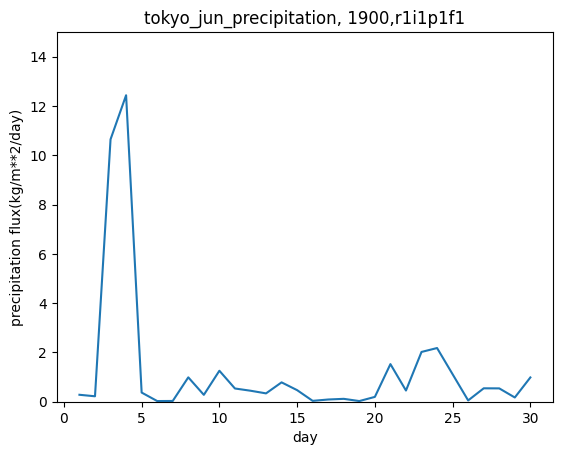

In [22]:
#試しに東京の気温の経年変化をグラフに表してみる。
#北緯36度、東経140度
point_lat=36 
point_lon=140
point_lon=point_lon+180
new_lat=0
new_lon=0
count_lat=0
count_lon=0
sum_pr=[]

for y in range(len(lat)):
  if  lat[y] > (point_lat-1) and lat[y] < (point_lat+1):
    if count_lat >= 1:
      if point_lat - lat[y] > point_lat - lat[new_lat] :
        new_lat=new_lat
      else:
        new_lat=y
    else:
      new_lat = y
   # print(lat[y],"!") #北緯35.719532477823975
    count_lat+=1
  else:
    pass

for x in range(len(lon)):
  if  lon[x] > (point_lon-1) and lon[x] < (point_lon+1):
    if count_lon >= 1:
      if point_lon - lon[x] > point_lon - lon[new_lon] :
        new_lon=new_lon
      else:
        new_lon=x
    else:
      new_lon = x
    count_lon+=1
  # print(lon[x]-180,"$") #東経140.625 $
  else:
    pass

print(count_lat)
print(count_lon)

###################1900年とする

for i in range(365):
  sum_pr.append(ds["pr"][i][new_lat][new_lon])

#lists & variables
pr_map = []
day_map = []
count = 0

# calculate average of sea ice extent every year
for i in range(len(sum_pr)):
   count += 1

########6月だけ出力他は無視(1900年は閏年ではない)#############
   if count >= (31+28+31+30+31) and count < (31+28+31+30+31+30):   # 1月は31日、2月は28日、3月は31日、4月は30日、5月は31日で6月は30日間のため
    pr_map.append(sum_pr[i]*60*60*24) #1秒あたりのため、1分になおし、1時間に直し、1日へ単位変換

print(pr_map)

for i in range(len(pr_map)):
  day_map.append(i+1)

print(day_map)
#plt.figure(figsize=(6, 6)
plt.plot(day_map, pr_map)
plt.ylim(0,15)
#plt.xlim(-1,165)
plt.ylabel('precipitation flux(kg/m**2/day)')
plt.title('tokyo_jun_precipitation, 1900,r1i1p1f1') 
plt.xlabel('day')
plt.show()    

###SSP5-8.5 2100年 6月

In [7]:
# データを読み込む
file_1 = current_directory + "pr_day_MIROC6_ssp585_r1i1p1f1_gn_20950101-21001231.nc"
ds_1 = Dataset(file_1, mode='r',format="NETCDF4")

In [8]:
print(ds_1) #メタデータへのアクセス

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.7 CMIP-6.2
    activity_id: ScenarioMIP
    branch_method: standard
    branch_time_in_child: 60265.0
    branch_time_in_parent: 60265.0
    creation_date: 2019-09-03T10:37:44Z
    data_specs_version: 01.00.31
    experiment: update of RCP8.5 based on SSP5
    experiment_id: ssp585
    external_variables: areacella
    forcing_index: 1
    frequency: day
    further_info_url: https://furtherinfo.es-doc.org/CMIP6.MIROC.MIROC6.ssp585.none.r1i1p1f1
    grid: native atmosphere T85 Gaussian grid
    grid_label: gn
    history: 2019-09-03T10:37:44Z ; CMOR rewrote data to be consistent with CMIP6, CF-1.7 CMIP-6.2 and CF standards.
    initialization_index: 1
    institution: JAMSTEC (Japan Agency for Marine-Earth Science and Technology, Kanagawa 236-0001, Japan), AORI (Atmosphere and Ocean Research Institute, The University of Tokyo, Chiba 277-8564, Japan), NIES (National Instit

In [49]:
#変数について
for var in ds_1.variables.values():
  print(var)

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    bounds: time_bnds
    units: days since 1850-1-1
    calendar: gregorian
    axis: T
    long_name: time
    standard_name: time
unlimited dimensions: time
current shape = (2191,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 time_bnds(time, bnds)
unlimited dimensions: time
current shape = (2191, 2)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    bounds: lat_bnds
    units: degrees_north
    axis: Y
    long_name: Latitude
    standard_name: latitude
unlimited dimensions: 
current shape = (128,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lat_bnds(lat, bnds)
unlimited dimensions: 
current shape = (128, 2)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    bounds: lon_bnds
   

In [53]:
##################閏年の処理#############
    #4で割り切れる年
    #100で割り切れない年、400で割り切れる年

a=[2095,2096,2097,2098,2099,2100]

for i in range(6):
  if a[i]%4 == 0 or a[i]%400 == 0:
    if a[i]%100 != 0:
      print(a[i], "閏")
    print(a[i])
  else:
    print(a[i])

365*6+1

2095
2096 閏
2096
2097
2098
2099
2100


2191

35.719532477823975 !
139.21875 $
140.625 $
1
2
[0.642503249400761, 1.015032417490147, 0.6531961087603122, 1.5443268930539489, 0.31490139008383267, 0.20736542937811464, 1.1889177490957081, 0.13747212433372624, 0.1469324608478928, 0.19318069535074756, 0.4504086129600182, 0.44535530760185793, 1.1829810042399913, 0.0023413949179484916, 6.668437850859883e-12, 0.002353655139586408, 0.19029098184546456, 3.8545223185792565, 0.4140917648328468, 0.002797432864554139, 0.0021757688898560446, 2.5396264528610183e-11, 0.00780357374878804, 0.04512453560892027, 0.013860462422599085, 0.07411745027638972, 4.05474737495687e-12, 0.08139189776557032, 0.8850506303133443, 2.218336734222248]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


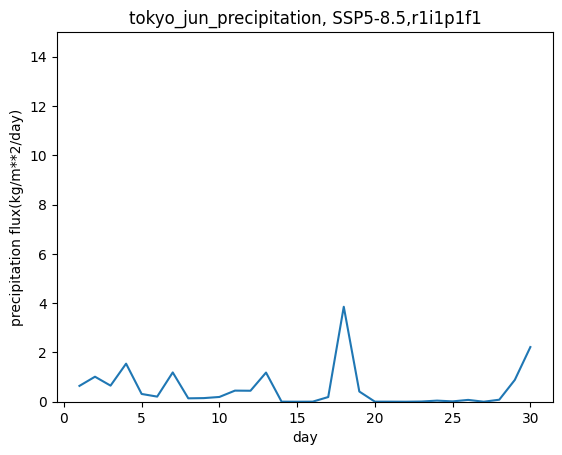

In [23]:
#SSP5-8.5での東京の気温の経年変化をグラフに表してみる。
#北緯36度、東経140度
point_lat=36 
point_lon=140
point_lon=point_lon+180
new_lat=0
new_lon=0
count_lat=0
count_lon=0
sum_pr=[]

for y in range(len(lat)):
  if  lat[y] > (point_lat-1) and lat[y] < (point_lat+1):
    if count_lat >= 1:
      if point_lat - lat[y] > point_lat - lat[new_lat] :
        new_lat=new_lat
      else:
        new_lat=y
    else:
      new_lat = y
    print(lat[y],"!") #北緯35.719532477823975
    count_lat+=1
  else:
    pass

for x in range(len(lon)):
  if  lon[x] > (point_lon-1) and lon[x] < (point_lon+1):
    if count_lon >= 1:
      if point_lon - lon[x] > point_lon - lon[new_lon] :
        new_lon=new_lon
      else:
        new_lon=x
    else:
      new_lon = x
    count_lon+=1
    print(lon[x]-180,"$") #東経140.625 $
  else:
    pass

print(count_lat)
print(count_lon)

###################2100年とする

for i in range(2191):
  sum_pr.append(ds_1["pr"][i][new_lat][new_lon])

#lists & variables
pr_map = []
day_map = []
count = 0
y_count=0

# calculate average of sea ice extent every year
for i in range(len(sum_pr)):
   count += 1
   y_count+=1

########6月だけ出力他は無視(2100年は閏年ではない)#############
   if y_count >= (2191-365): #2100年だけ
     if count >= (31+28+31+30+31) and count < (31+28+31+30+31+30):   # 1月は31日、2月は28日、3月は31日、4月は30日、5月は31日で6月は30日間のため
       pr_map.append(sum_pr[i]*60*60*24) #1秒あたりのため、1分になおし、1時間に直し、1日へ単位変換
   else:
    count=0

for i in range(len(pr_map)):
  day_map.append(i+1)

print(pr_map)
print(day_map)
#plt.figure(figsize=(6, 6)
plt.plot(day_map, pr_map)
plt.ylim(0,15)
#plt.xlim(-1,165)
plt.ylabel('precipitation flux(kg/m**2/day)')
plt.title('tokyo_jun_precipitation, SSP5-8.5,r1i1p1f1') 
plt.xlabel('day')
plt.show()    

###SSP3-7.0 2100年6月

In [14]:
# データを読み込む
file_2 = current_directory + "pr_day_MIROC6_ssp370_r1i1p1f1_gn_20950101-21001231.nc"
ds_2 = Dataset(file_2, mode='r',format="NETCDF4")

In [15]:
print(ds_2)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.7 CMIP-6.2
    activity_id: ScenarioMIP AerChemMIP
    branch_method: standard
    branch_time_in_child: 60265.0
    branch_time_in_parent: 60265.0
    creation_date: 2019-09-03T06:42:53Z
    data_specs_version: 01.00.31
    experiment: gap-filling scenario reaching 7.0 based on SSP3
    experiment_id: ssp370
    external_variables: areacella
    forcing_index: 1
    frequency: day
    further_info_url: https://furtherinfo.es-doc.org/CMIP6.MIROC.MIROC6.ssp370.none.r1i1p1f1
    grid: native atmosphere T85 Gaussian grid
    grid_label: gn
    history: 2019-09-03T06:42:53Z ; CMOR rewrote data to be consistent with CMIP6, CF-1.7 CMIP-6.2 and CF standards.
    initialization_index: 1
    institution: JAMSTEC (Japan Agency for Marine-Earth Science and Technology, Kanagawa 236-0001, Japan), AORI (Atmosphere and Ocean Research Institute, The University of Tokyo, Chiba 277-8564, J

35.719532477823975 !
139.21875 $
140.625 $
1
2
[0.6410908463294618, 1.723265805048868, 0.3184305511240382, 0.13038299875915982, 0.1604899371159263, 0.29293696643435396, 15.002027107402682, 0.6895069062011316, 0.4301853332435712, 0.9497382823610678, 0.8692265924764797, 0.40288793679792434, 0.01986160509659385, 0.6524327793158591, 0.11707355151884258, 1.3041313824942335, 0.2031422860454768, 1.4812281355261803, 1.074418646749109, 0.27985864362563007, 2.732101959219361e-11, 0.7684724492719397, 0.9059761825483292, 2.392266148970091e-11, 0.00681561380133644, 0.0477051287816721, 0.10714761665440165, 0.15317820325435605, 0.06785287805541884, 0.04254804334777873]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


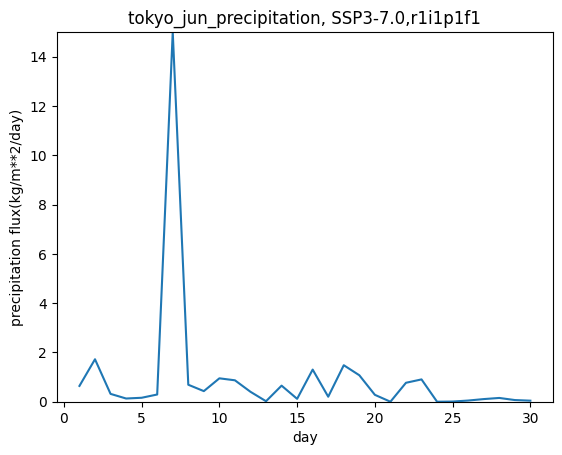

In [24]:
#SSP5-8.5での東京の気温の経年変化をグラフに表してみる。
#北緯36度、東経140度
point_lat=36 
point_lon=140
point_lon=point_lon+180
new_lat=0
new_lon=0
count_lat=0
count_lon=0
sum_pr=[]

for y in range(len(lat)):
  if  lat[y] > (point_lat-1) and lat[y] < (point_lat+1):
    if count_lat >= 1:
      if point_lat - lat[y] > point_lat - lat[new_lat] :
        new_lat=new_lat
      else:
        new_lat=y
    else:
      new_lat = y
    print(lat[y],"!") #北緯35.719532477823975
    count_lat+=1
  else:
    pass

for x in range(len(lon)):
  if  lon[x] > (point_lon-1) and lon[x] < (point_lon+1):
    if count_lon >= 1:
      if point_lon - lon[x] > point_lon - lon[new_lon] :
        new_lon=new_lon
      else:
        new_lon=x
    else:
      new_lon = x
    count_lon+=1
    print(lon[x]-180,"$") #東経140.625 $
  else:
    pass

print(count_lat)
print(count_lon)

###################2100年とする

for i in range(2191):
  sum_pr.append(ds_2["pr"][i][new_lat][new_lon])

#lists & variables
pr_map = []

day_map = []
count = 0
y_count=0

# calculate average of sea ice extent every year
for i in range(len(sum_pr)):
   count += 1
   y_count+=1

########6月だけ出力他は無視(2100年は閏年ではない)#############
   if y_count >= (2191-365): #2100年だけ
     if count >= (31+28+31+30+31) and count < (31+28+31+30+31+30):   # 1月は31日、2月は28日、3月は31日、4月は30日、5月は31日で6月は30日間のため
       pr_map.append(sum_pr[i]*60*60*24) #1秒あたりのため、1分になおし、1時間に直し、1日へ単位変換
   else:
    count=0

for i in range(len(pr_map)):
  day_map.append(i+1)

print(pr_map)
print(day_map)
#plt.figure(figsize=(6, 6)
plt.plot(day_map, pr_map)
plt.ylim(0,15)
#plt.xlim(-1,165)
plt.ylabel('precipitation flux(kg/m**2/day)')
plt.title('tokyo_jun_precipitation, SSP3-7.0,r1i1p1f1') 
plt.xlabel('day')
plt.show()   

###SSP2-4.5 2100年6月

In [26]:
# データを読み込む
file_3 = current_directory + "pr_day_MIROC6_ssp245_r1i1p1f1_gn_20950101-21001231.nc"
ds_3 = Dataset(file_3, mode='r',format="NETCDF4")

In [27]:
print(ds_3)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.7 CMIP-6.2
    activity_id: ScenarioMIP
    branch_method: standard
    branch_time_in_child: 60265.0
    branch_time_in_parent: 60265.0
    creation_date: 2019-09-03T02:45:25Z
    data_specs_version: 01.00.31
    experiment: update of RCP4.5 based on SSP2
    experiment_id: ssp245
    external_variables: areacella
    forcing_index: 1
    frequency: day
    further_info_url: https://furtherinfo.es-doc.org/CMIP6.MIROC.MIROC6.ssp245.none.r1i1p1f1
    grid: native atmosphere T85 Gaussian grid
    grid_label: gn
    history: 2019-09-03T02:45:25Z ; CMOR rewrote data to be consistent with CMIP6, CF-1.7 CMIP-6.2 and CF standards.
    initialization_index: 1
    institution: JAMSTEC (Japan Agency for Marine-Earth Science and Technology, Kanagawa 236-0001, Japan), AORI (Atmosphere and Ocean Research Institute, The University of Tokyo, Chiba 277-8564, Japan), NIES (National Instit

35.719532477823975 !
139.21875 $
140.625 $
1
2
[0.454907730454579, 0.006817015355409239, 0.11994680244242772, 1.1296211800072342, 1.2070107943145558, 1.6204600862693042, 1.7163763521239161, 0.7417320302920416, 0.1711158656689804, 0.09014951974677388, 0.013126833891874412, 0.5968936471617781, 0.19377374119358137, 0.33187668886967003, 1.5407755330670625, 0.29782588171656244, 1.7768761434126645, 0.49185251409653574, 1.6086136281955987, 1.561996468808502, 0.5963295974652283, 0.600380846299231, 0.17932000700966455, 0.011399741106288275, 2.093113143928349, 0.6598163454327732, 0.36339817161206156, 0.3263056176365353, 0.7111456536222249, 0.6697271339362487]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


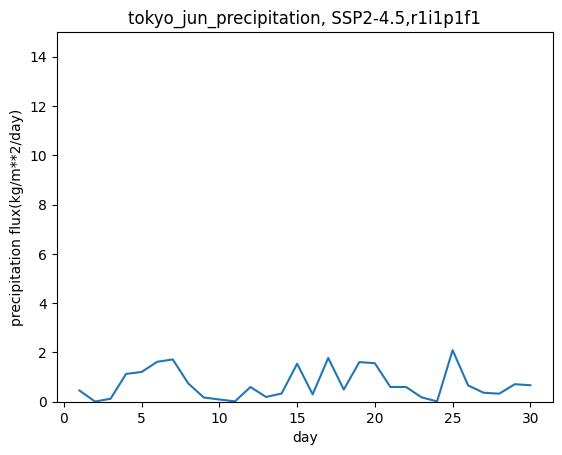

In [28]:
#SSP2-4.5での東京の気温の経年変化をグラフに表してみる。
#北緯36度、東経140度
point_lat=36 
point_lon=140
point_lon=point_lon+180
new_lat=0
new_lon=0
count_lat=0
count_lon=0
sum_pr=[]

for y in range(len(lat)):
  if  lat[y] > (point_lat-1) and lat[y] < (point_lat+1):
    if count_lat >= 1:
      if point_lat - lat[y] > point_lat - lat[new_lat] :
        new_lat=new_lat
      else:
        new_lat=y
    else:
      new_lat = y
    print(lat[y],"!") #北緯35.719532477823975
    count_lat+=1
  else:
    pass

for x in range(len(lon)):
  if  lon[x] > (point_lon-1) and lon[x] < (point_lon+1):
    if count_lon >= 1:
      if point_lon - lon[x] > point_lon - lon[new_lon] :
        new_lon=new_lon
      else:
        new_lon=x
    else:
      new_lon = x
    count_lon+=1
    print(lon[x]-180,"$") #東経140.625 $
  else:
    pass

print(count_lat)
print(count_lon)

###################2100年とする

for i in range(2191):
  sum_pr.append(ds_3["pr"][i][new_lat][new_lon])

#lists & variables
pr_map = []

day_map = []
count = 0
y_count=0

# calculate average of sea ice extent every year
for i in range(len(sum_pr)):
   count += 1
   y_count+=1

########6月だけ出力他は無視(2100年は閏年ではない)#############
   if y_count >= (2191-365): #2100年だけ
     if count >= (31+28+31+30+31) and count < (31+28+31+30+31+30):   # 1月は31日、2月は28日、3月は31日、4月は30日、5月は31日で6月は30日間のため
       pr_map.append(sum_pr[i]*60*60*24) #1秒あたりのため、1分になおし、1時間に直し、1日へ単位変換
   else:
    count=0

for i in range(len(pr_map)):
  day_map.append(i+1)

print(pr_map)
print(day_map)
#plt.figure(figsize=(6, 6)
plt.plot(day_map, pr_map)
plt.ylim(0,15)
#plt.xlim(-1,165)
plt.ylabel('precipitation flux(kg/m**2/day)')
plt.title('tokyo_jun_precipitation, SSP2-4.5,r1i1p1f1') 
plt.xlabel('day')
plt.show()   